In [1]:
#Lab | Cleaning numerical data

In [2]:
#1. Import the necessary libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

data =  pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv',index_col=0)

In [4]:
#3. First look at its main features (head, shape, info).
data.head(5)

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
data.shape

(9134, 23)

In [6]:
data.info

<bound method DataFrame.info of                State  Customer Lifetime Value Response  Coverage Education  \
Customer                                                                     
BU79786   Washington              2763.519279       No     Basic  Bachelor   
QZ44356      Arizona              6979.535903       No  Extended  Bachelor   
AI49188       Nevada             12887.431650       No   Premium  Bachelor   
WW63253   California              7645.861827       No     Basic  Bachelor   
HB64268   Washington              2813.692575       No     Basic  Bachelor   
...              ...                      ...      ...       ...       ...   
LA72316   California             23405.987980       No     Basic  Bachelor   
PK87824   California              3096.511217      Yes  Extended   College   
TD14365   California              8163.890428       No  Extended  Bachelor   
UP19263   California              7524.442436       No  Extended   College   
Y167826   California            

In [7]:
data.dtypes

State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [8]:
#4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)
data.columns = data.columns.str.lower()
data.columns

Index(['state', 'customer lifetime value', 'response', 'coverage', 'education',
       'effective to date', 'employmentstatus', 'gender', 'income',
       'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size'],
      dtype='object')

In [9]:
data.columns = [col.replace(' ', '_') for col in data.columns]
data.columns

Index(['state', 'customer_lifetime_value', 'response', 'coverage', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'income',
       'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [10]:
#5. Change effective to date column to datetime format.
from datetime import datetime
data['effective_to_date'] = data['effective_to_date'].apply(lambda x: datetime.strptime(x, '%m/%d/%y'))
data.head(1)

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize


In [11]:
#6. Create a new dataframe using only the numerical data called numerical_df. Use this for the following questions.
numerical_df = data._get_numeric_data()
numerical_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
Customer,,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1,384.811147
QZ44356,6979.535903,0,94,13,42,0,8,1131.464935
AI49188,12887.431650,48767,108,18,38,0,2,566.472247
WW63253,7645.861827,0,106,18,65,0,7,529.881344
HB64268,2813.692575,43836,73,12,44,0,1,138.130879


In [12]:
#7. Define a function that differentiates between continuous and discrete variables. 
#Hint: The number of unique values might be useful. 
#Store continuous data into a continuous_df variable and do the same for discrete_df

In [25]:
def separate_continuous_discrete(data):
    continuous_df = data.select_dtypes(include=['float64', 'int64'])
    discrete_df = data.select_dtypes(include=['object', 'bool'])
    return continuous_df, discrete_df

continuous_df, discrete_df = separate_continuous_discrete(data)

In [19]:
unique_num = data.nunique()
unique_num

state                               5
customer_lifetime_value          8041
response                            2
coverage                            3
education                           5
effective_to_date                  59
employmentstatus                    5
gender                              2
income                           5694
location_code                       3
marital_status                      3
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
policy_type                         3
policy                              9
renew_offer_type                    4
sales_channel                       4
total_claim_amount               5106
vehicle_class                       6
vehicle_size                        3
dtype: int64

In [26]:
continuous_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
Customer,,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1,384.811147
QZ44356,6979.535903,0,94,13,42,0,8,1131.464935
AI49188,12887.431650,48767,108,18,38,0,2,566.472247
WW63253,7645.861827,0,106,18,65,0,7,529.881344
HB64268,2813.692575,43836,73,12,44,0,1,138.130879


In [27]:
discrete_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
Customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


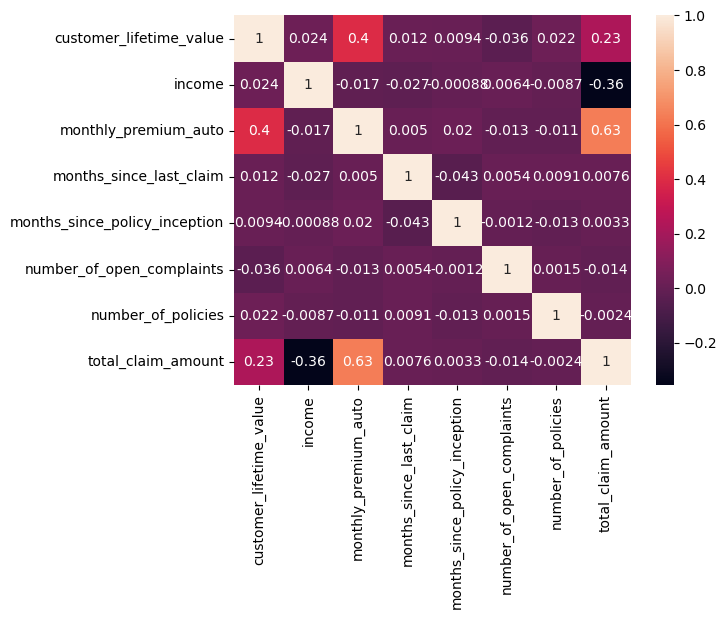

In [28]:
#8. Plot a correlation matrix, comment what you see.
sns.heatmap(numerical_df.corr(),annot=True)
plt.show()

#Any of the variables are strongly correlated (above 68%)
#We can see some correlation between:
#monthly_premium_auto and customer_liftime_value
#customer_liftime_value and total_claim_amount
#monthly_premium_auto and total_claim_amount

In [29]:
#9. Create a function to plot every discrete variable. 
#Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

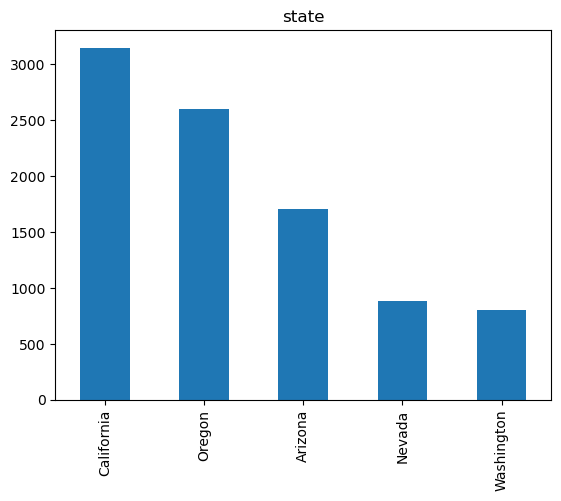

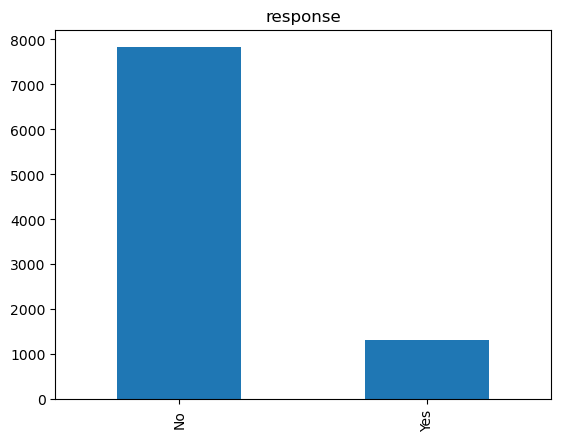

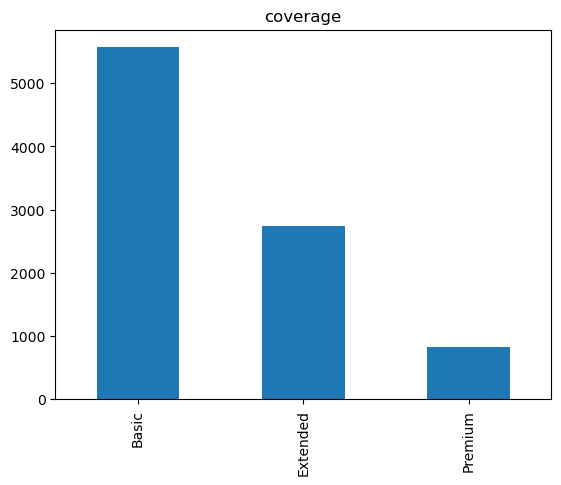

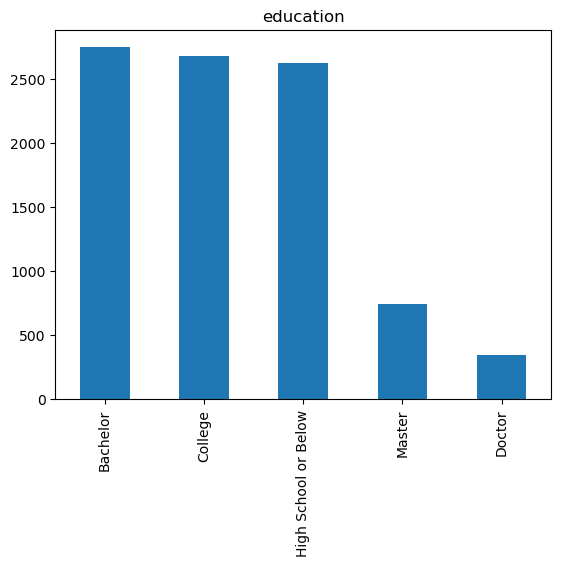

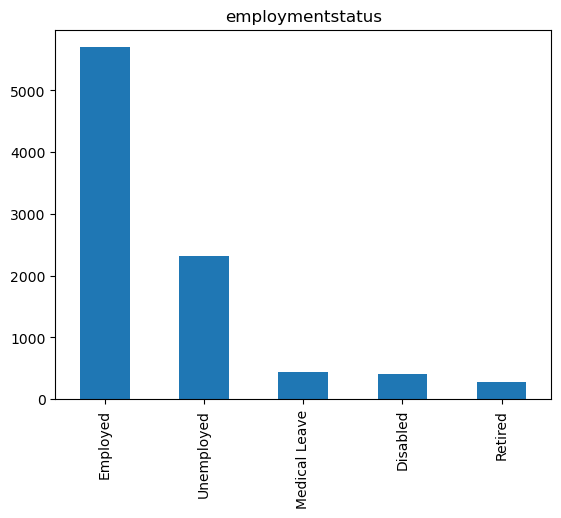

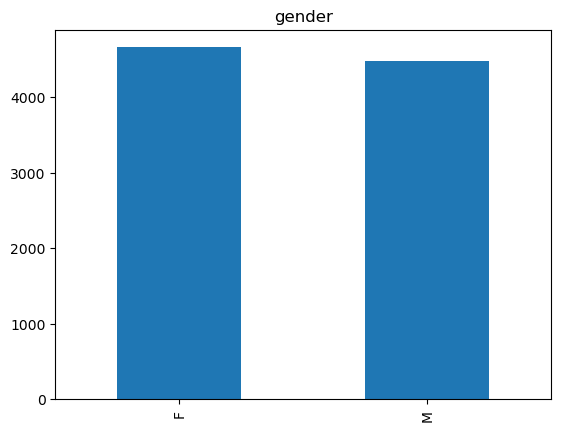

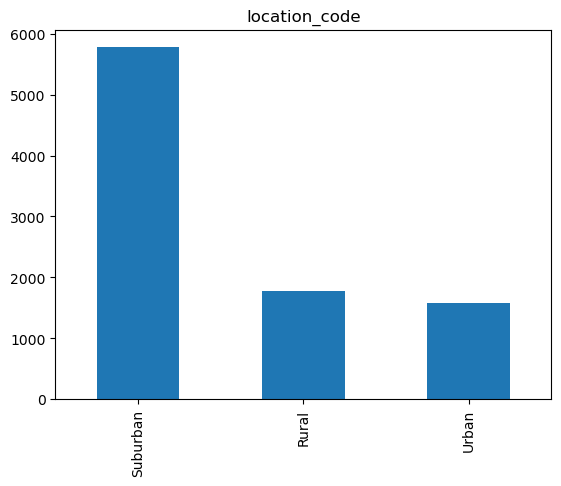

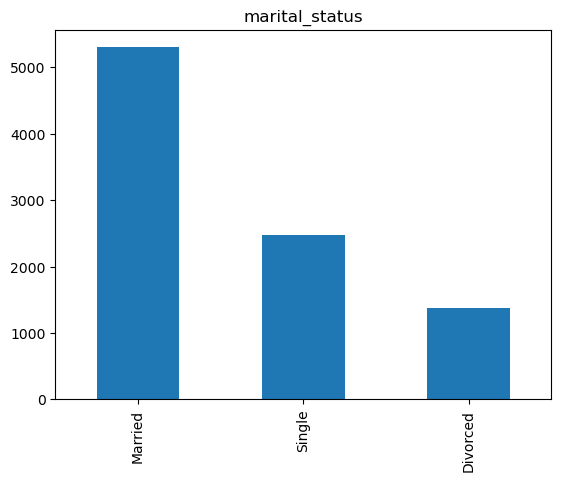

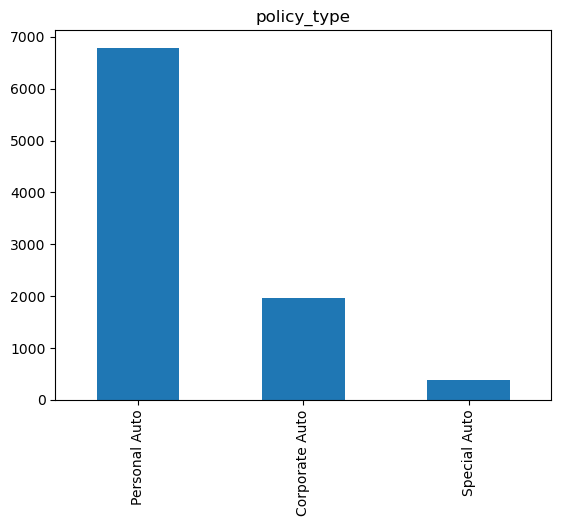

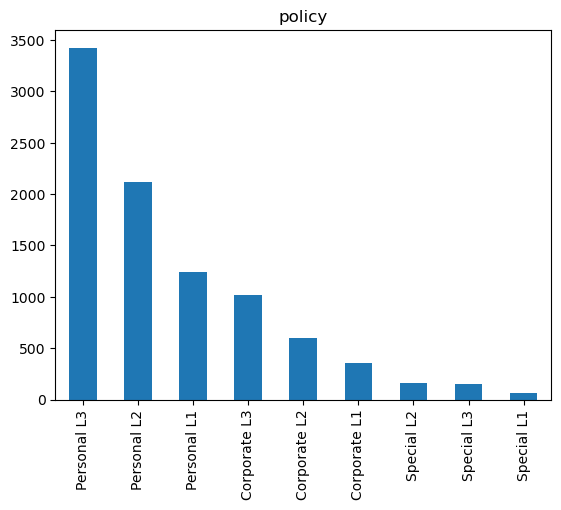

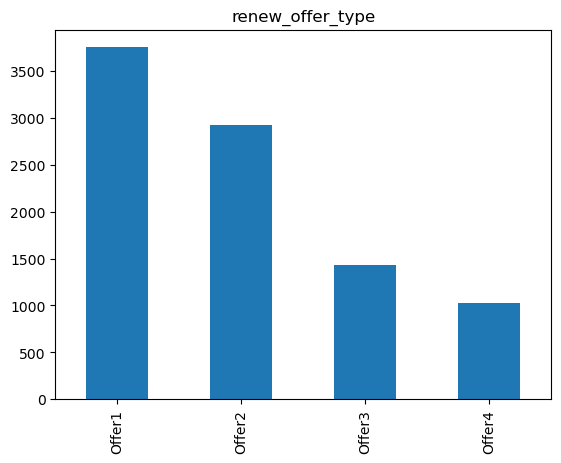

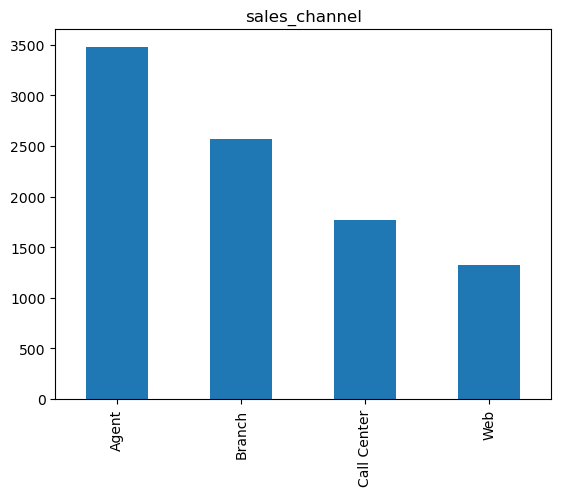

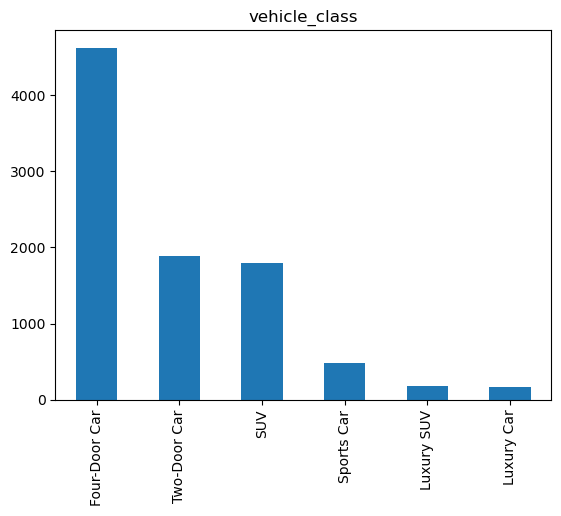

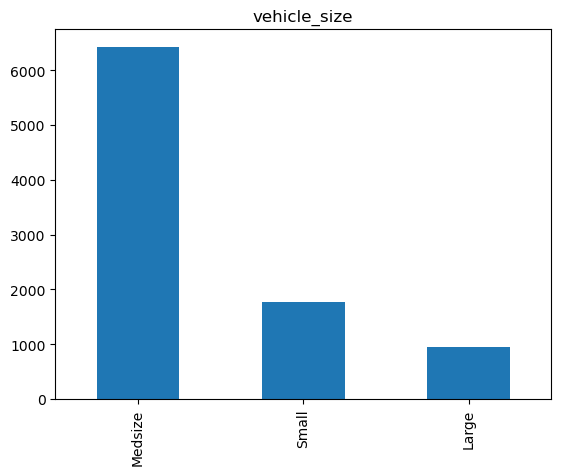

In [30]:
def plot_discrete_variables(discrete_df):
  
    for col in discrete_df.columns:
        plt.figure()
        plt.title(col)
        discrete_df[col].value_counts().plot(kind='bar')

plot_discrete_variables(discrete_df)

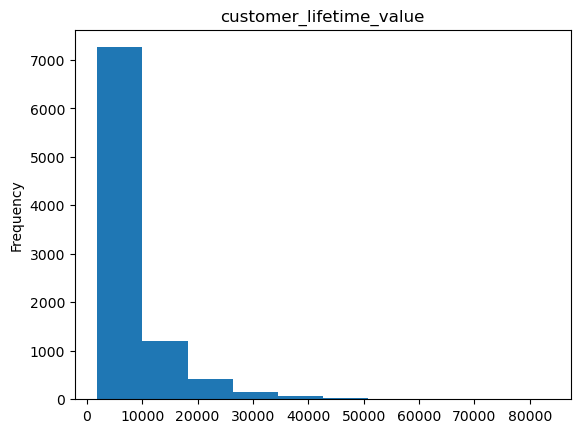

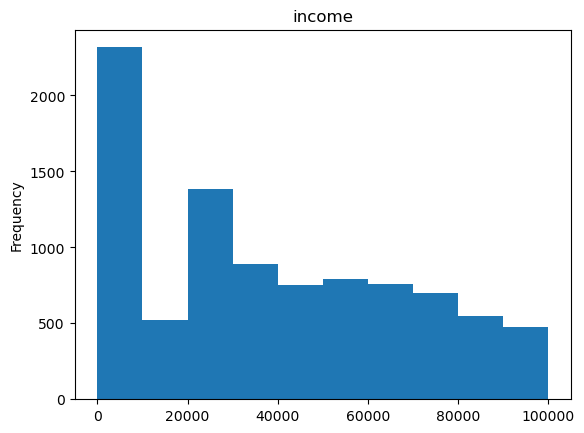

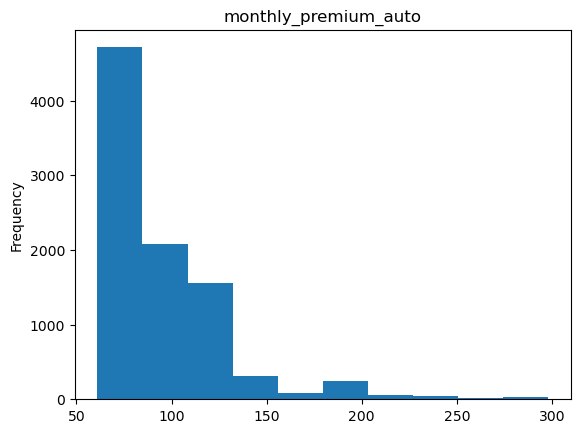

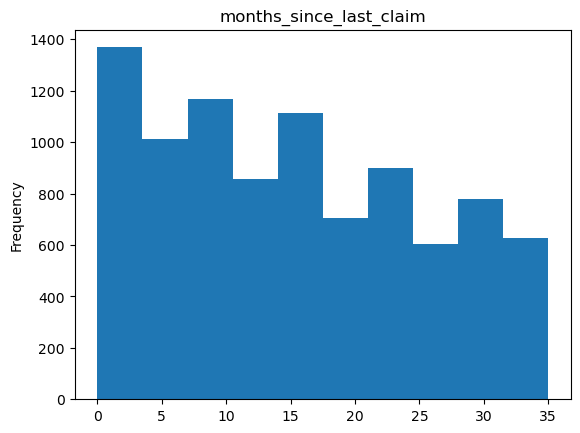

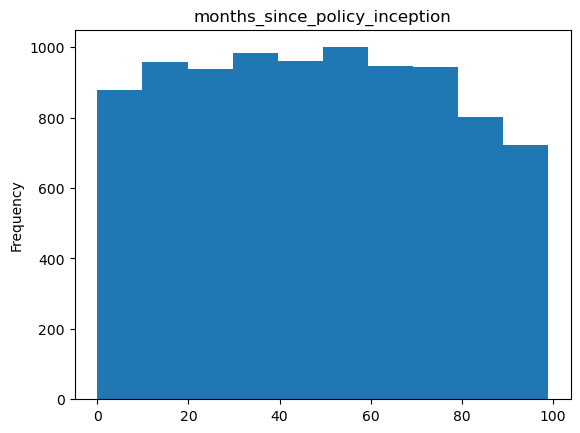

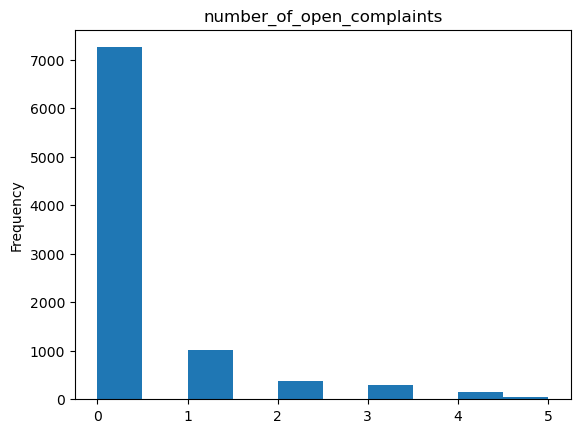

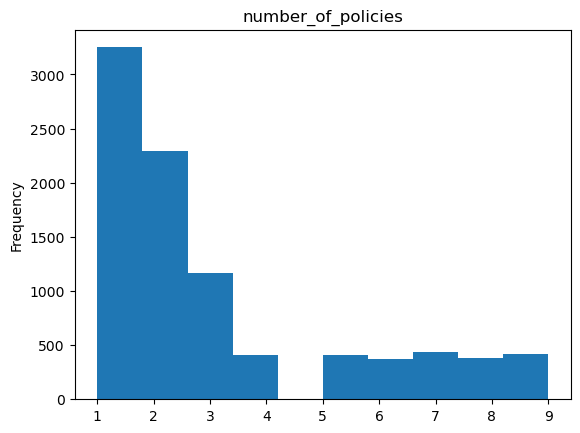

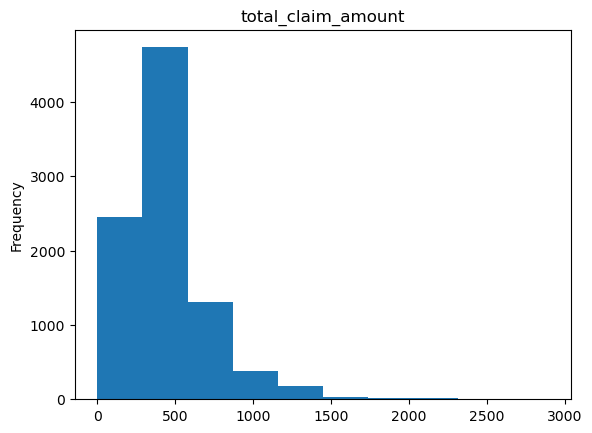

In [31]:
def plot_continuous_variables(continuous_df):
    
    for col in continuous_df.columns:
        plt.figure()
        plt.title(col)
        continuous_df[col].plot(kind='hist')
        
plot_continuous_variables(continuous_df)

In [ ]:
#10.Comment what you can see in the plots.

#Discrete values have been grouped into the categories (columns) so we can see their volume 
#Continuous values - we can see the distribution of the data using a histogram. All the charts are left skewd


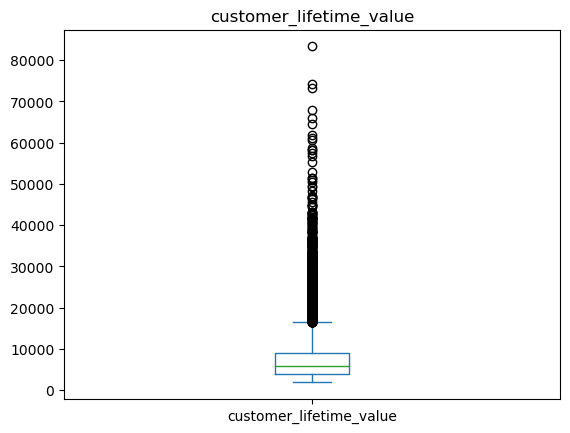

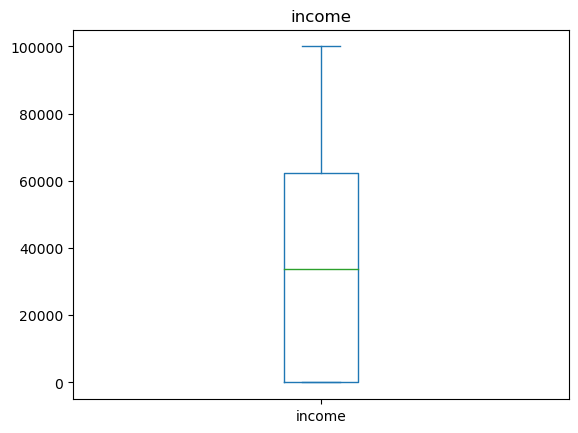

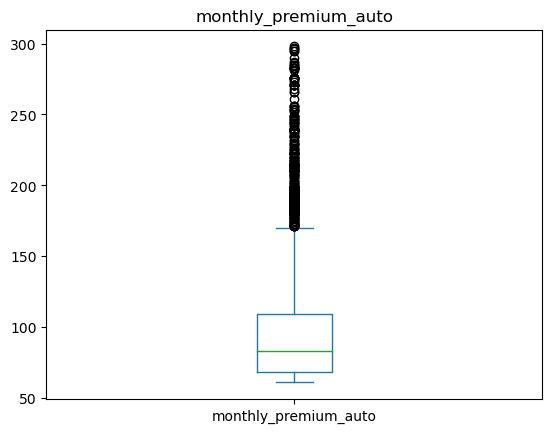

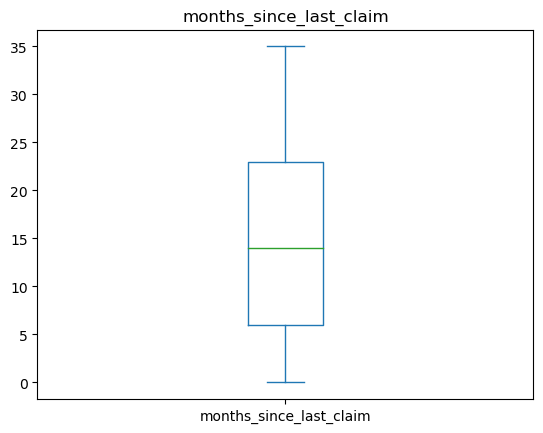

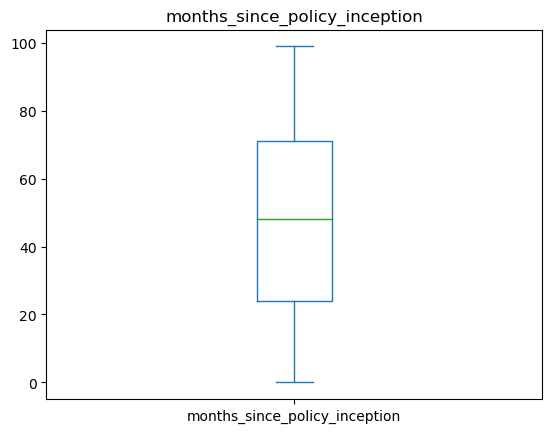

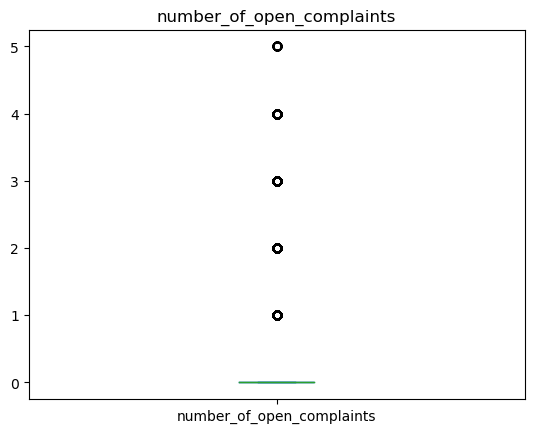

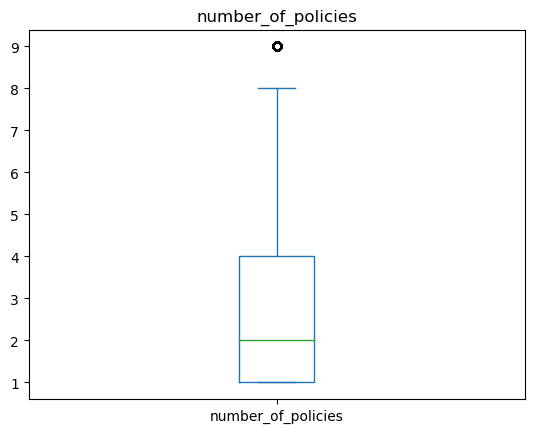

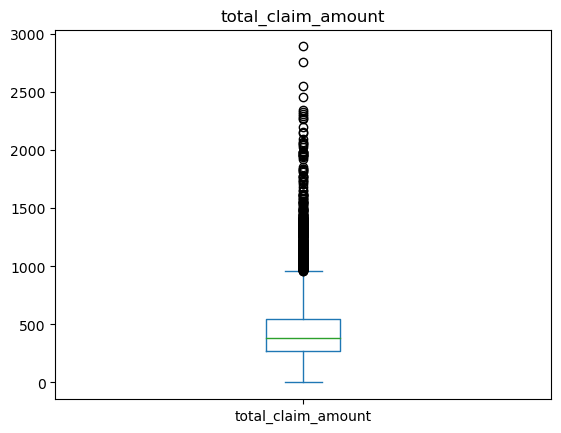

In [32]:
#11.Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

def plot_outliers(continuous_df):
    
    for col in continuous_df.columns:
        plt.figure()
        plt.title(col)
        continuous_df[col].plot(kind='box')

plot_outliers(continuous_df)

In [ ]:
#12.Did you find outliers? Comment what you will do with them. If you decide to remove them, do that now.
#Yes, I did find outliers but I am not going to clean them since I don't know yet what will be the goal of the task. Maybe I will need them. 


In [33]:
#13.Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.
continuous_df.isna().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
dtype: int64

In [39]:
#14.Save the numerical_df to csv as numerical.csv You will use this file again this week.
numerical_df.to_csv('numerical.csv', index=False)